In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from scipy import stats

from datetime import datetime

In [2]:
import os
os.getcwd()

'C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\NoteBooks'

In [3]:
train_data = pd.read_csv('C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\Train.csv')
test_data = pd.read_csv('C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\Test.csv')
riders = pd.read_csv('C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\Riders.csv')

In [4]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [5]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [6]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [7]:
x = train_data.columns
y = test_data.columns

fts = (set(x) - set(y))

In [8]:
train_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [9]:
train_data['Arrival at Destination - Time'].dtype

dtype('O')

In [10]:
train_data['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

In [11]:
train_data['Pickup - Time'].head()

0    10:27:30 AM
1    11:44:09 AM
2    12:53:03 PM
3     9:43:06 AM
4    10:05:23 AM
Name: Pickup - Time, dtype: object

In [12]:
train_data['Arrival at Destination - Time'].head()

0    10:39:55 AM
1    12:17:22 PM
2     1:00:38 PM
3    10:05:27 AM
4    10:25:37 AM
Name: Arrival at Destination - Time, dtype: object

In [13]:
#(pd.to_datetime(train_data['Arrival at Destination - Time']) - pd.to_datetime(train_data['Arrival at Pickup - Time'])).astype('timedelta64[s]')#.dt.

In [14]:
fts

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

In [15]:
train_data.drop([
    'Arrival at Destination - Day of Month', 'Arrival at Destination - Time', 
    'Arrival at Destination - Weekday (Mo = 1)'
], axis=1, inplace=True)

print(train_data.shape)
test_data.shape

(21201, 26)


(7068, 25)

In [16]:
train_data.drop_duplicates(keep='first', inplace=True)
test_data.drop_duplicates(keep='first', inplace=True)

In [17]:
print(train_data.shape)
test_data.shape

(21201, 26)


(7068, 25)

In [18]:
train_data['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

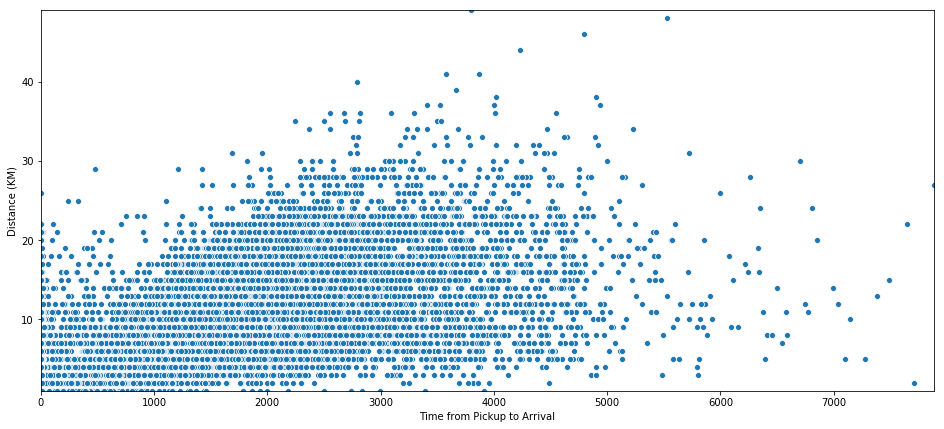

In [19]:
plt.figure(figsize=(16, 7))
ax = sns.scatterplot(x='Time from Pickup to Arrival', y='Distance (KM)', data=train_data);
ax.autoscale(axis='both', tight=True)

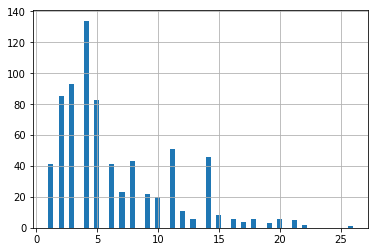

In [20]:
train_data[(train_data['Time from Pickup to Arrival']<60)]['Distance (KM)'].hist(bins=60)

In [21]:
train_data.isnull().sum()[train_data.isnull().sum().values>0]

Temperature                      4366
Precipitation in millimeters    20649
dtype: int64

In [22]:
(train_data['Time from Pickup to Arrival'].mean() - 3*train_data['Time from Pickup to Arrival'].std())/60

-23.41485694091335

In [23]:
(train_data['Time from Pickup to Arrival'].mean() + train_data['Time from Pickup to Arrival'].std())/60

42.40319558308524

In [24]:
train_data[(train_data['Time from Pickup to Arrival']<60)]['Distance (KM)'].describe()

count    740.000000
mean       6.417568
std        4.601872
min        1.000000
25%        3.000000
50%        5.000000
75%        9.000000
max       26.000000
Name: Distance (KM), dtype: float64

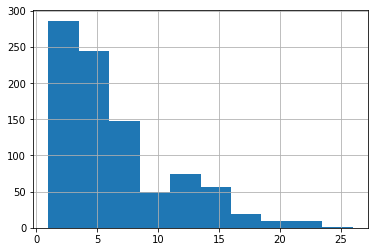

In [25]:
train_data[train_data['Time from Pickup to Arrival']<180]['Distance (KM)'].hist()

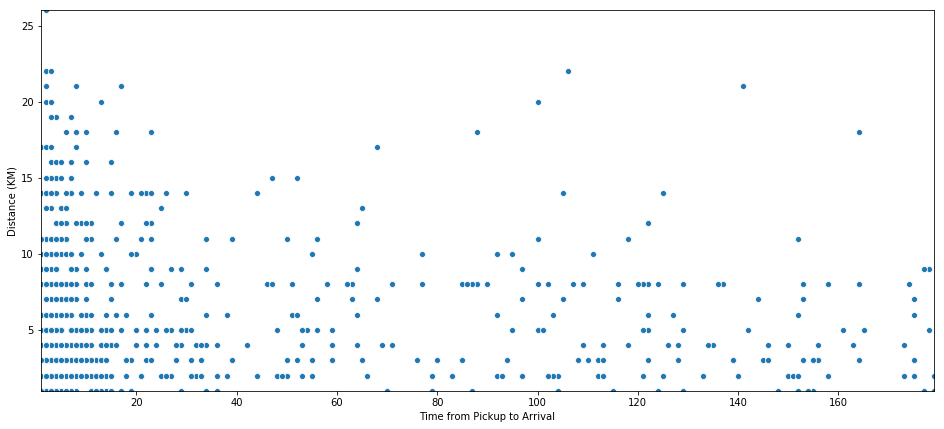

In [26]:
plt.figure(figsize=(16, 7))
ax = sns.scatterplot(x='Time from Pickup to Arrival', y='Distance (KM)', data=train_data[train_data['Time from Pickup to Arrival']<180]);
ax.autoscale(axis='both', tight=True)

In [27]:
train_data['Temperature'] = train_data['Temperature'].fillna(train_data['Temperature'].mean())
train_data['Precipitation in millimeters'] = train_data['Precipitation in millimeters'].fillna(0)

test_data['Temperature'] = test_data['Temperature'].fillna(train_data['Temperature'].mean())
test_data['Precipitation in millimeters'] = test_data['Precipitation in millimeters'].fillna(0)

In [28]:
train_data['Precipitation in millimeters'].mean()

0.20583934720060382

In [29]:
train_data['Precipitation in millimeters'].std()

3.029194402907023

In [30]:
train_data['Precipitation in millimeters'].median()

0.0

In [31]:
train_data.drop('Vehicle Type', axis=1, inplace=True)
test_data.drop('Vehicle Type', axis=1, inplace=True)

In [32]:
train_data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')

In [33]:
train_orders = train_data.groupby('User Id', as_index=False)['Order No'].count().rename(columns={'Order No' : 'No_of_Orders_per_User'}).reset_index(drop=True)
test_orders = test_data.groupby('User Id', as_index=False)['Order No'].count().rename(columns={'Order No' : 'No_of_Orders_per_User'}).reset_index(drop=True)


train_data = pd.merge(train_data, train_orders, on='User Id', how='left')
test_data = pd.merge(test_data, test_orders, on='User Id', how='left')

In [34]:
#train_data.head()

In [35]:
def sort_day_of_month(day):
    
    if day in range(1, 8):
        return 'first_wk'
    elif day in range(8, 15):
        return 'second_wk'
    elif day in range(15, 22):
        return 'third_wk'
    elif day in range(22, 29):
        return 'fourth_wk'
    else:
        return 'fifth_wk'
    

train_data['Week_of_Placement'] = train_data['Placement - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Placement'] = test_data['Placement - Day of Month'].map(sort_day_of_month)

train_data['Week_of_Confirmation'] = train_data['Confirmation - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Confirmation'] = test_data['Confirmation - Day of Month'].map(sort_day_of_month)

train_data['Week_of_Arrival'] = train_data['Arrival at Pickup - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Arrival'] = test_data['Arrival at Pickup - Day of Month'].map(sort_day_of_month)

train_data['Week_of_Pickup'] = train_data['Pickup - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Pickup'] = test_data['Pickup - Day of Month'].map(sort_day_of_month)

In [36]:
train_data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'No_of_Orders_per_User',
       'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival',
       'Week_of_Pickup'],
      dtype='object')

In [37]:
train_data['Placement_hour'] = pd.to_datetime(train_data['Placement - Time']).dt.hour
train_data['Placement_min'] = pd.to_datetime(train_data['Placement - Time']).dt.minute
train_data['Placement_sec'] = pd.to_datetime(train_data['Placement - Time']).dt.second

test_data['Placement_hour'] = pd.to_datetime(test_data['Placement - Time']).dt.hour
test_data['Placement_min'] = pd.to_datetime(test_data['Placement - Time']).dt.minute
test_data['Placement_sec'] = pd.to_datetime(test_data['Placement - Time']).dt.second


#--------------------

train_data['Confirmation_hour'] = pd.to_datetime(train_data['Confirmation - Time']).dt.hour
train_data['Confirmation_min'] = pd.to_datetime(train_data['Confirmation - Time']).dt.minute
train_data['Confirmation_sec'] = pd.to_datetime(train_data['Confirmation - Time']).dt.second

test_data['Confirmation_hour'] = pd.to_datetime(test_data['Confirmation - Time']).dt.hour
test_data['Confirmation_min'] = pd.to_datetime(test_data['Confirmation - Time']).dt.minute
test_data['Confirmation_sec'] = pd.to_datetime(test_data['Confirmation - Time']).dt.second


#---------------------------------


train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival at Pickup - Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival at Pickup - Time']).dt.minute
train_data['Arrival_sec'] = pd.to_datetime(train_data['Arrival at Pickup - Time']).dt.second

test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival at Pickup - Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival at Pickup - Time']).dt.minute
test_data['Arrival_sec'] = pd.to_datetime(test_data['Arrival at Pickup - Time']).dt.second


#--------------------

train_data['Pickup_hour'] = pd.to_datetime(train_data['Pickup - Time']).dt.hour
train_data['Pickup_min'] = pd.to_datetime(train_data['Pickup - Time']).dt.minute
train_data['Pickup_sec'] = pd.to_datetime(train_data['Pickup - Time']).dt.second

test_data['Pickup_hour'] = pd.to_datetime(test_data['Pickup - Time']).dt.hour
test_data['Pickup_min'] = pd.to_datetime(test_data['Pickup - Time']).dt.minute
test_data['Pickup_sec'] = pd.to_datetime(test_data['Pickup - Time']).dt.second


#---------------------------------

In [38]:
def day_period(hr):
    
    if hr in range(0, 6):
        return 'early_morning'
    elif hr in range(6, 12):
        return 'morning'
    elif hr in range(12, 16):
        return 'afternoon'
    elif hr in range(16, 20):
        return 'evening'
    else:
        return 'nighttime'
    

train_data['Placement_period'] = train_data['Placement_hour'].map(day_period)
test_data['Placement_period'] = test_data['Placement_hour'].map(day_period)

train_data['Confirmation_period'] = train_data['Confirmation_hour'].map(day_period)
test_data['Confirmation_period'] = test_data['Confirmation_hour'].map(day_period)

train_data['Arrival_period'] = train_data['Arrival_hour'].map(day_period)
test_data['Arrival_period'] = test_data['Arrival_hour'].map(day_period)

train_data['Pickup_period'] = train_data['Pickup_hour'].map(day_period)
test_data['Pickup_period'] = test_data['Pickup_hour'].map(day_period)

In [39]:
def min_period(min):
    
    if min in range(0, 16):
        return 'first_quarter'
    elif min in range(16, 31):
        return 'second_quarter'
    elif min in range(31, 46):
        return 'third_quarter'
    else:
        return 'fourth_quarter'
    
    

train_data['Placement_min_period'] = train_data['Placement_min'].map(min_period)
test_data['Placement_min_period'] = test_data['Placement_min'].map(min_period)

train_data['Confirmation_min_period'] = train_data['Confirmation_min'].map(min_period)
test_data['Confirmation_min_period'] = test_data['Confirmation_min'].map(min_period)

train_data['Arrival_min_period'] = train_data['Arrival_min'].map(min_period)
test_data['Arrival_min_period'] = test_data['Arrival_min'].map(min_period)

train_data['Pickup_min_period'] = train_data['Pickup_min'].map(min_period)
test_data['Pickup_min_period'] = test_data['Pickup_min'].map(min_period)

In [40]:
train_data['Placement_time_secs'] = train_data['Placement_hour']*3600 + train_data['Placement_min']*60 + train_data['Placement_sec']
test_data['Placement_time_secs'] = test_data['Placement_hour']*3600 + test_data['Placement_min']*60 + test_data['Placement_sec']

train_data['Confirmation_time_secs'] = train_data['Confirmation_hour']*3600 + train_data['Confirmation_min']*60 + train_data['Confirmation_sec']
test_data['Confirmation_time_secs'] = test_data['Confirmation_hour']*3600 + test_data['Confirmation_min']*60 + test_data['Confirmation_sec']

train_data['Arrival_time_secs'] = train_data['Arrival_hour']*3600 + train_data['Arrival_min']*60 + train_data['Arrival_sec']
test_data['Arrival_time_secs'] = test_data['Arrival_hour']*3600 + test_data['Arrival_min']*60 + test_data['Arrival_sec']

train_data['Pickup_time_secs'] = train_data['Pickup_hour']*3600 + train_data['Pickup_min']*60 + train_data['Pickup_sec']
test_data['Pickup_time_secs'] = test_data['Pickup_hour']*3600 + test_data['Pickup_min']*60 + test_data['Pickup_sec']

In [41]:
pd.to_datetime(train_data['Pickup - Time']).head()

0   2019-10-11 10:27:30
1   2019-10-11 11:44:09
2   2019-10-11 12:53:03
3   2019-10-11 09:43:06
4   2019-10-11 10:05:23
Name: Pickup - Time, dtype: datetime64[ns]

In [42]:
pd.to_datetime(train_data['Pickup - Time']).astype('datetime64[s]')

0       2019-10-11 10:27:30
1       2019-10-11 11:44:09
2       2019-10-11 12:53:03
3       2019-10-11 09:43:06
4       2019-10-11 10:05:23
5       2019-10-11 15:30:30
6       2019-10-11 09:56:45
7       2019-10-11 14:22:40
8       2019-10-11 12:22:57
9       2019-10-11 17:34:38
10      2019-10-11 10:14:53
11      2019-10-11 16:17:27
12      2019-10-11 15:01:57
13      2019-10-11 09:27:34
14      2019-10-11 10:27:05
15      2019-10-11 13:38:25
16      2019-10-11 12:15:32
17      2019-10-11 12:25:08
18      2019-10-11 11:33:31
19      2019-10-11 14:50:07
20      2019-10-11 10:44:52
21      2019-10-11 11:15:38
22      2019-10-11 19:49:09
23      2019-10-11 10:35:25
24      2019-10-11 15:53:17
25      2019-10-11 12:52:48
26      2019-10-11 15:01:56
27      2019-10-11 12:42:07
28      2019-10-11 14:28:10
29      2019-10-11 08:45:10
                ...        
21171   2019-10-11 13:19:01
21172   2019-10-11 12:03:11
21173   2019-10-11 16:41:12
21174   2019-10-11 17:06:54
21175   2019-10-11 1

In [43]:
train_data.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Arrival_period,Pickup_period,Placement_min_period,Confirmation_min_period,Arrival_min_period,Pickup_min_period,Placement_time_secs,Confirmation_time_secs,Arrival_time_secs,Pickup_time_secs
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,morning,morning,third_quarter,third_quarter,first_quarter,second_quarter,34546,34810,36287,37650
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,morning,morning,second_quarter,second_quarter,third_quarter,third_quarter,40576,41001,42022,42249
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,afternoon,afternoon,third_quarter,third_quarter,fourth_quarter,fourth_quarter,45565,45764,46174,46383
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,morning,morning,second_quarter,second_quarter,third_quarter,third_quarter,33934,33965,34676,34986
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,...,morning,morning,fourth_quarter,fourth_quarter,first_quarter,first_quarter,35718,35778,36233,36323


In [44]:
train_data['Confirmation - Placement'] = train_data['Confirmation_time_secs'] - train_data['Placement_time_secs']
train_data['Arrival - Confirmation'] = train_data['Arrival_time_secs'] - train_data['Confirmation_time_secs']
train_data['Pickup - Arrival'] = train_data['Pickup_time_secs'] - train_data['Pickup_time_secs']
train_data['Pickup - Confirmation'] = train_data['Pickup_time_secs'] - train_data['Confirmation_time_secs']
train_data['Pickup - Placement'] = train_data['Pickup_time_secs'] - train_data['Placement_time_secs']



test_data['Confirmation - Placement'] = test_data['Confirmation_time_secs'] - test_data['Placement_time_secs']
test_data['Arrival - Confirmation'] = test_data['Arrival_time_secs'] - test_data['Confirmation_time_secs']
test_data['Pickup - Arrival'] = test_data['Pickup_time_secs'] - test_data['Pickup_time_secs']
test_data['Pickup - Confirmation'] = test_data['Pickup_time_secs'] - test_data['Confirmation_time_secs']
test_data['Pickup - Placement'] = test_data['Pickup_time_secs'] - test_data['Placement_time_secs']

In [45]:
train_data.drop([
    'Placement_hour', 'Placement_min', 'Placement_sec', 'Confirmation_hour', 'Confirmation_min',
    'Confirmation_sec', 'Arrival_hour', 'Arrival_min', 'Arrival_sec', 'Pickup_hour', 'Pickup_min',
    'Pickup_sec'
], axis=1, inplace=True)


test_data.drop([
    'Placement_hour', 'Placement_min', 'Placement_sec', 'Confirmation_hour', 'Confirmation_min',
    'Confirmation_sec', 'Arrival_hour', 'Arrival_min', 'Arrival_sec', 'Pickup_hour', 'Pickup_min',
    'Pickup_sec'
], axis=1, inplace=True)

In [46]:
#train_data.columns

In [47]:
train_data['Cyclic_Placement_x'] = train_data['Placement_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Confirmation_x'] = train_data['Confirmation_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Arrival_x'] = train_data['Arrival_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Pickup_x'] = train_data['Pickup_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))

train_data['Cyclic_Placement_y'] = train_data['Placement_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Confirmation_y'] = train_data['Confirmation_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Arrival_y'] = train_data['Arrival_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Pickup_y'] = train_data['Pickup_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))


#---------------------------



test_data['Cyclic_Placement_x'] = test_data['Placement_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Confirmation_x'] = test_data['Confirmation_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Arrival_x'] = test_data['Arrival_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Pickup_x'] = test_data['Pickup_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))

test_data['Cyclic_Placement_y'] = test_data['Placement_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Confirmation_y'] = test_data['Confirmation_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Arrival_y'] = test_data['Arrival_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Pickup_y'] = test_data['Pickup_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))

In [48]:
#train_data.columns

In [49]:
train_data.drop([
    'Placement_time_secs', 'Confirmation_time_secs', 'Arrival_time_secs', 'Pickup_time_secs'
], axis=1, inplace=True)

test_data.drop([
    'Placement_time_secs', 'Confirmation_time_secs', 'Arrival_time_secs', 'Pickup_time_secs'
], axis=1, inplace=True)

In [50]:
#train_data.columns

In [51]:
train_data['Cyclic_Confirmation_Placement_x'] = train_data['Confirmation - Placement'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Arrival_Confirmation_x'] = train_data['Arrival - Confirmation'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Arrival_x'] = train_data['Pickup - Arrival'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Confirmation_x'] = train_data['Pickup - Confirmation'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Placement_x'] = train_data['Pickup - Placement'].map(lambda x: math.sin(2*math.pi*x/86400))

train_data['Cyclic_Confirmation_Placement_y'] = train_data['Confirmation - Placement'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Arrival_Confirmation_y'] = train_data['Arrival - Confirmation'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Arrival_y'] = train_data['Pickup - Arrival'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Confirmation_y'] = train_data['Pickup - Confirmation'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Placement_y'] = train_data['Pickup - Placement'].map(lambda x: math.cos(2*math.pi*x/86400))


#-------------------



test_data['Cyclic_Confirmation_Placement_x'] = test_data['Confirmation - Placement'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Arrival_Confirmation_x'] = test_data['Arrival - Confirmation'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Arrival_x'] = test_data['Pickup - Arrival'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Confirmation_x'] = test_data['Pickup - Confirmation'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Placement_x'] = test_data['Pickup - Placement'].map(lambda x: math.sin(2*math.pi*x/86400))

test_data['Cyclic_Confirmation_Placement_y'] = test_data['Confirmation - Placement'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Arrival_Confirmation_y'] = test_data['Arrival - Confirmation'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Arrival_y'] = test_data['Pickup - Arrival'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Confirmation_y'] = test_data['Pickup - Confirmation'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Placement_y'] = test_data['Pickup - Placement'].map(lambda x: math.cos(2*math.pi*x/86400))

In [52]:
#train_data.columns

In [53]:
train_data.drop([
    'Confirmation - Placement', 'Arrival - Confirmation', 'Pickup - Arrival', 'Pickup - Confirmation',
    'Pickup - Placement'
], axis=1, inplace=True)


test_data.drop([
    'Confirmation - Placement', 'Arrival - Confirmation', 'Pickup - Arrival', 'Pickup - Confirmation',
    'Pickup - Placement'
], axis=1, inplace=True)

In [54]:
train_data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'No_of_Orders_per_User',
       'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival',
       'Week_of_Pickup', 'Placement_period', 'Confirmation_period',
       'Arrival_period', 'Pickup_period', 'Placement_min_period',
       'Confirmation_min_period', 'Arrival_min_period', 'Pickup_min_period',
       'Cyclic_Placement_x', 'Cyclic_Con

In [55]:
train_data = train_data.rename(columns={
    'Pickup Lat' : 'lat1', 'Pickup Long' : 'lng1', 
    'Destination Lat' : 'lat2', 'Destination Long' : 'lng2'
})

test_data = test_data.rename(columns={
    'Pickup Lat' : 'lat1', 'Pickup Long' : 'lng1', 
    'Destination Lat' : 'lat2', 'Destination Long' : 'lng2'
})

In [56]:
#A. Haversine Distance Between the Two Lat/Lons:

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train_data['Haversine_Distance'] = haversine_array(**train_data[['lat1', 'lng1', 'lat2', 'lng2']])
test_data['Haversine_Distance'] = haversine_array(**test_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [57]:
#B. Manhattan Distance Between the two Lat/Lons:

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

train_data['Manhattan_Distance'] = dummy_manhattan_distance(**train_data[['lat1', 'lng1', 'lat2', 'lng2']])
test_data['Manhattan_Distance'] = dummy_manhattan_distance(**test_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [58]:
#C. Bearing Between the two Lat/Lons:

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

train_data['Bearing'] = bearing_array(**train_data[['lat1', 'lng1', 'lat2', 'lng2']])
test_data['Bearing'] = bearing_array(**test_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [59]:
#D. ---- Center Latitude and Longitude between Pickup and Dropoff:

train_data.loc[:, 'center_latitude'] = (train_data['lat1'].values + train_data['lat2'].values) / 2
train_data.loc[:, 'center_longitude'] = (train_data['lng1'].values + train_data['lng2'].values) / 2


test_data.loc[:, 'center_latitude'] = (test_data['lat1'].values + test_data['lat2'].values) / 2
test_data.loc[:, 'center_longitude'] = (test_data['lng1'].values + test_data['lng2'].values) / 2

In [60]:
#E. ---X, Y, Z???


train_data['X-coord_Pickup'] = np.cos(train_data['lat1']) * np.cos(train_data['lng1'])
train_data['Y-coord-Pickup'] = np.cos(train_data['lat1']) * np.sin(train_data['lng1'])
train_data['Z-coord-Pickup'] = np.sin(train_data['lat1'])

test_data['X-coord_Pickup'] = np.cos(test_data['lat1']) * np.cos(test_data['lng1'])
test_data['Y-coord-Pickup'] = np.cos(test_data['lat1']) * np.sin(test_data['lng1'])
test_data['Z-coord-Pickup'] = np.sin(test_data['lat1'])


#------------------------------------------


train_data['X-coord_Dest.'] = np.cos(train_data['lat2']) * np.cos(train_data['lng2'])
train_data['Y-coord-Dest.'] = np.cos(train_data['lat2']) * np.sin(train_data['lng2'])
train_data['Z-coord-Dest.'] = np.sin(train_data['lat2'])

test_data['X-coord_Dest.'] = np.cos(test_data['lat2']) * np.cos(test_data['lng2'])
test_data['Y-coord-Dest.'] = np.cos(test_data['lat2']) * np.sin(test_data['lng2'])
test_data['Z-coord-Dest.'] = np.sin(test_data['lat2'])

In [61]:
#train_data.head()

In [62]:
#train_data[['Distance (KM)', 'Haversine_Distance', 'Manhattan_Distance']]

In [63]:
#F. Lat-Long

train_data['latlng1'] = train_data['lat1'] + train_data['lng1']
train_data['latlng2'] = train_data['lat2'] + train_data['lng2']


test_data['latlng1'] = test_data['lat1'] + test_data['lng1']
test_data['latlng2'] = test_data['lat2'] + test_data['lng2']

In [64]:
train_data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters', 'lat1',
       'lng1', 'lat2', 'lng2', 'Rider Id', 'Time from Pickup to Arrival',
       'No_of_Orders_per_User', 'Week_of_Placement', 'Week_of_Confirmation',
       'Week_of_Arrival', 'Week_of_Pickup', 'Placement_period',
       'Confirmation_period', 'Arrival_period', 'Pickup_period',
       'Placement_min_period', 'Confirmation_min_period', 'Arrival_min_period',
       'Pickup_min_period', 'Cyclic_Placement_x', 'Cyclic_Confirmation_x',
       'Cyclic_Arrival_x', 'C

((array([-3.9924755 , -3.77701968, -3.6591535 , ...,  3.6591535 ,
          3.77701968,  3.9924755 ]),
  array([ 1,  1,  1, ..., 46, 48, 49], dtype=int64)),
 (5.454922807448605, 9.506532710721194, 0.9620919246776083))

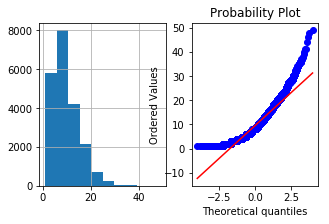

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

ax1 = train_data['Distance (KM)'].hist(figsize=(5, 3), ax=ax[0])

ax2 = ax[1]
stats.probplot(train_data['Distance (KM)'], plot = ax2)
#ax2.set_title('', size=18)

((array([-3.9924755 , -3.77701968, -3.6591535 , ...,  3.6591535 ,
          3.77701968,  3.9924755 ]),
  array([1.        , 1.        , 1.        , ..., 2.15056001, 2.16894354,
         2.17790642])),
 (0.19099964510996684, 1.5233677363315952, 0.9951741992843194))

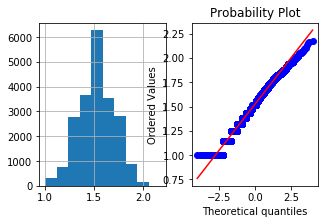

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

ax1 = (train_data['Distance (KM)']**(1/5)).hist(figsize=(5, 3), ax=ax[0])

ax2 = ax[1]
stats.probplot((train_data['Distance (KM)']**(1/5)), plot = ax2)
#ax2.set_title('', size=18)

In [67]:
train_data['Distance (KM)'] = train_data['Distance (KM)']**(1/5)
test_data['Distance (KM)'] = test_data['Distance (KM)']**(1/5)

In [68]:
#(test_data['Haversine_Distance']**(1/3)).hist()

train_data['Haversine_Distance'] = train_data['Haversine_Distance']**(1/3)
test_data['Haversine_Distance'] = test_data['Haversine_Distance']**(1/3)

train_data['Manhattan_Distance'] = train_data['Manhattan_Distance']**(1/3)
test_data['Manhattan_Distance'] = test_data['Manhattan_Distance']**(1/3)

In [69]:
train_data['Platform Type'] = train_data['Platform Type'].astype(str)
test_data['Platform Type'] = test_data['Platform Type'].astype(str)

In [70]:
train_data['Placement_Day_x'] = train_data['Placement - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
train_data['Confirmation_Day_x'] = train_data['Confirmation - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
train_data['Pickup_Day_x'] = train_data['Pickup - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
train_data['Arrival_Day_x'] = train_data['Arrival at Pickup - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))


train_data['Placement_Day_y'] = train_data['Placement - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
train_data['Confirmation_Day_y'] = train_data['Confirmation - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
train_data['Pickup_Day_y'] = train_data['Pickup - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
train_data['Arrival_Day_y'] = train_data['Arrival at Pickup - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))


#-------------------



test_data['Placement_Day_x'] = test_data['Placement - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
test_data['Confirmation_Day_x'] = test_data['Confirmation - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
test_data['Pickup_Day_x'] = test_data['Pickup - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
test_data['Arrival_Day_x'] = test_data['Arrival at Pickup - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))


test_data['Placement_Day_y'] = test_data['Placement - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
test_data['Confirmation_Day_y'] = test_data['Confirmation - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
test_data['Pickup_Day_y'] = test_data['Pickup - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
test_data['Arrival_Day_y'] = test_data['Arrival at Pickup - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))

In [71]:
train_data['Placement_WDay_x'] = train_data['Placement - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
train_data['Confirmation_WDay_x'] = train_data['Confirmation - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
train_data['Pickup_WDay_x'] = train_data['Pickup - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
train_data['Arrival_WDay_x'] = train_data['Arrival at Pickup - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))


train_data['Placement_WDay_y'] = train_data['Placement - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
train_data['Confirmation_WDay_y'] = train_data['Confirmation - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
train_data['Pickup_WDay_y'] = train_data['Pickup - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
train_data['Arrival_WDay_y'] = train_data['Arrival at Pickup - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))


#-------------------



test_data['Placement_WDay_x'] = test_data['Placement - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
test_data['Confirmation_WDay_x'] = test_data['Confirmation - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
test_data['Pickup_WDay_x'] = test_data['Pickup - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
test_data['Arrival_WDay_x'] = test_data['Arrival at Pickup - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))


test_data['Placement_WDay_y'] = test_data['Placement - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
test_data['Confirmation_WDay_y'] = test_data['Confirmation - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
test_data['Pickup_WDay_y'] = test_data['Pickup - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
test_data['Arrival_WDay_y'] = test_data['Arrival at Pickup - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))

In [72]:
train_data.shape

(21201, 85)

In [73]:
#train_data.columns[-30:]

In [74]:
train_data.select_dtypes(include='object').columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Rider Id', 'Week_of_Placement',
       'Week_of_Confirmation', 'Week_of_Arrival', 'Week_of_Pickup',
       'Placement_period', 'Confirmation_period', 'Arrival_period',
       'Pickup_period', 'Placement_min_period', 'Confirmation_min_period',
       'Arrival_min_period', 'Pickup_min_period'],
      dtype='object')

In [75]:
train_data.drop([
    'Order No', 'User Id', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
    'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival', 'Week_of_Pickup', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)'
], axis=1, inplace=True)

orderNo = test_data['Order No']
test_data.drop([
    'Order No', 'User Id', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
    'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival', 'Week_of_Pickup', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)'
], axis=1, inplace=True)

In [76]:
train_data.columns

Index(['Platform Type', 'Personal or Business', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'lat1', 'lng1', 'lat2', 'lng2',
       'Rider Id', 'Time from Pickup to Arrival', 'No_of_Orders_per_User',
       'Placement_period', 'Confirmation_period', 'Arrival_period',
       'Pickup_period', 'Placement_min_period', 'Confirmation_min_period',
       'Arrival_min_period', 'Pickup_min_period', 'Cyclic_Placement_x',
       'Cyclic_Confirmation_x', 'Cyclic_Arrival_x', 'Cyclic_Pickup_x',
       'Cyclic_Placement_y', 'Cyclic_Confirmation_y', 'Cyclic_Arrival_y',
       'Cyclic_Pickup_y', 'Cyclic_Confirmation_Placement_x',
       'Cyclic_Arrival_Confirmation_x', 'Cyclic_Pickup_Arrival_x',
       'Cyclic_Pickup_Confirmation_x', 'Cyclic_Pickup_Placement_x',
       'Cyclic_Confirmation_Placement_y', 'Cyclic_Arrival_Confirmation_y',
       'Cyclic_Pickup_Arrival_y', 'Cyclic_Pickup_Confirmation_y',
       'Cyclic_Pickup_Placement_y', 'Haversine_Distance', 'Manhattan_Distance

In [77]:
train_data.shape

(21201, 67)

In [78]:
train_data = pd.merge(train_data, riders, on='Rider Id', how='left')
test_data = pd.merge(test_data, riders, on='Rider Id', how='left')

In [79]:
train_data.select_dtypes(include='object').columns

Index(['Platform Type', 'Personal or Business', 'Rider Id', 'Placement_period',
       'Confirmation_period', 'Arrival_period', 'Pickup_period',
       'Placement_min_period', 'Confirmation_min_period', 'Arrival_min_period',
       'Pickup_min_period'],
      dtype='object')

In [80]:
train_data.drop('Rider Id', axis=1, inplace=True)
test_data.drop('Rider Id', axis=1, inplace=True)

In [81]:
train_data.head()

,Platform Type,Personal or Business,Distance (KM),Temperature,Precipitation in millimeters,lat1,lng1,lat2,lng2,Time from Pickup to Arrival,...,Pickup_WDay_x,Arrival_WDay_x,Placement_WDay_y,Confirmation_WDay_y,Pickup_WDay_y,Arrival_WDay_y,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,1.319508,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,745,...,-0.974928,-0.974928,-0.222521,-0.222521,-0.222521,-0.222521,1637,1309,13.8,549
1,3,Personal,1.741101,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,...,-0.974928,-0.974928,-0.222521,-0.222521,-0.222521,-0.222521,396,339,13.6,69
2,3,Business,1.245731,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,455,...,0.974928,0.974928,-0.222521,-0.222521,-0.222521,-0.222521,1023,242,12.5,114
3,3,Business,1.551846,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,1341,...,-0.974928,-0.974928,-0.222521,-0.222521,-0.222521,-0.222521,886,283,14.5,113
4,1,Personal,1.551846,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1214,...,0.781831,0.781831,0.623490,0.623490,0.623490,0.623490,2311,872,14.1,533


In [82]:
test_data.head()

,Platform Type,Personal or Business,Distance (KM),Temperature,Precipitation in millimeters,lat1,lng1,lat2,lng2,No_of_Orders_per_User,...,Pickup_WDay_x,Arrival_WDay_x,Placement_WDay_y,Confirmation_WDay_y,Pickup_WDay_y,Arrival_WDay_y,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,1.515717,23.258889,0.0,-1.333275,36.870815,-1.305249,36.822390,44,...,0.433884,0.433884,-0.900969,-0.900969,-0.900969,-0.900969,439,1511,13.3,171
1,3,Business,1.379730,23.258889,0.0,-1.272639,36.794723,-1.277007,36.823907,102,...,-0.974928,-0.974928,-0.222521,-0.222521,-0.222521,-0.222521,488,273,14.4,45
2,3,Business,1.379730,22.800000,0.0,-1.290894,36.822971,-1.276574,36.851365,26,...,-0.433884,-0.433884,-0.900969,-0.900969,-0.900969,-0.900969,833,460,13.1,67
3,3,Business,1.379730,24.500000,0.0,-1.290503,36.809646,-1.303382,36.790658,2,...,0.781831,0.781831,0.623490,0.623490,0.623490,0.623490,487,560,13.7,44
4,3,Business,1.430969,24.400000,0.0,-1.281081,36.814423,-1.266467,36.792161,24,...,0.974928,0.974928,-0.222521,-0.222521,-0.222521,-0.222521,4761,1120,14.1,1010


In [83]:
time = train_data['Time from Pickup to Arrival']

train_num = train_data.drop('Time from Pickup to Arrival', axis=1).select_dtypes(exclude='object')
test_num = test_data.select_dtypes(exclude='object')

train_cat = train_data.select_dtypes(include='object')
test_cat = test_data.select_dtypes(include='object')

train_cat['label'] = 1
test_cat['label'] = 0

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [84]:
combined = pd.concat([train_cat, test_cat], axis=0)#.reset_index(drop=True)

In [85]:
combined = pd.get_dummies(combined, columns=combined.columns[:-1], drop_first=True)

train_cat = combined[combined['label']==1]
test_cat = combined[combined['label']==0]

In [86]:
train_cat.drop('label', axis=1, inplace=True)
test_cat.drop('label', axis=1, inplace=True)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [87]:
train_data = pd.concat([train_num, train_cat, time], axis=1)
test_data = pd.concat([test_num, test_cat], axis=1)

In [88]:
train_data.head()

,Distance (KM),Temperature,Precipitation in millimeters,lat1,lng1,lat2,lng2,No_of_Orders_per_User,Cyclic_Placement_x,Cyclic_Confirmation_x,...,Confirmation_min_period_fourth_quarter,Confirmation_min_period_second_quarter,Confirmation_min_period_third_quarter,Arrival_min_period_fourth_quarter,Arrival_min_period_second_quarter,Arrival_min_period_third_quarter,Pickup_min_period_fourth_quarter,Pickup_min_period_second_quarter,Pickup_min_period_third_quarter,Time from Pickup to Arrival
0,1.319508,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,182,0.588609,0.572981,...,0,0,1,0,0,0,0,1,0,745
1,1.741101,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,8,0.189667,0.159235,...,0,1,0,0,0,1,0,0,1,1993
2,1.245731,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,162,-0.171141,-0.185381,...,0,0,1,1,0,0,1,0,0,455
3,1.551846,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,74,0.623993,0.622230,...,0,1,0,0,0,1,0,0,1,1341
4,1.551846,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1,0.517654,0.513916,...,1,0,0,0,0,0,0,0,0,1214


In [89]:
train_data.shape

(21201, 92)

In [90]:
test_data.shape

(7068, 91)

In [91]:
set(test_data.columns) - set(train_data.columns)

set()

In [92]:
y = train_data['Time from Pickup to Arrival']
X = train_data.drop('Time from Pickup to Arrival', axis=1)

In [93]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
xgbm = xgb.XGBRegressor(
    n_estimators=250, max_depth=4, learning_rate=0.08, subsample=0.8, colsample_bytree=0.8, 
    n_jobs=-1, random_state=42
)

xgbm.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:47:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [97]:
math.sqrt(mean_squared_error(y_test, xgbm.predict(X_test)))

753.2560355237115

In [98]:
math.sqrt(-cross_val_score(xgbm, X_train, y_train, cv=KFold(n_splits=5), scoring='neg_mean_squared_error', n_jobs=-1).mean())

741.999901746331

In [99]:
pred = xgbm.predict(test_data)

In [100]:
sub = pd.DataFrame({'Order No' : orderNo, 'Time from Pickup to Arrival' : pred})

sub.to_csv('rough_sub.csv', index=False)

In [96]:
import lightgbm as lgb

In [96]:
lgbm = lgb.LGBMRegressor(
    n_estimators=250, max_depth=4, learning_rate=0.08, subsample=0.8, colsample_bytree=0.8, 
    n_jobs=-1, random_state=42
)

lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
       importance_type='split', learning_rate=0.08, max_depth=4,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=250, n_jobs=-1, num_leaves=31, objective=None,
       random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [100]:
math.sqrt(mean_squared_error(y_test,lgbm.predict(X_test)))

751.8313989759566

In [101]:
math.sqrt(-cross_val_score(lgbm, X_train, y_train, cv=KFold(n_splits=5), scoring='neg_mean_squared_error', n_jobs=-1).mean())

740.0212304827016

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rfc = RandomForestRegressor(
    n_estimators=100, max_depth=4, max_features=0.7, n_jobs=-1, random_state=2
)

rfc.fit(X_train, y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [99]:
math.sqrt(mean_squared_error(y_test, rfc.predict(X_test)))

793.5303835874516

In [100]:
math.sqrt(-cross_val_score(rfc, X_train, y_train, cv=KFold(n_splits=5), scoring='neg_mean_squared_error', n_jobs=-1).mean())

782.5112770184307

In [97]:
from sklearn.model_selection import GridSearchCV

<h3>Tuning</h3>

In [101]:
params_1 = {
    'max_depth' : [4, 5, 6],
    'min_child_weight' : [2, 3, 4]
}

grid = GridSearchCV(
    xgb.XGBRegressor(
    max_depth=4, min_child_weight=1, gamma = 0, subsample=0.8, colsample_bytree=0.8,
    nthread=-1
), params_1, scoring='neg_mean_squared_error', n_jobs=-1, refit=True, verbose=0, cv=KFold(n_splits=5)
)

grid.fit(X_train, y_train)

#grid.grid_scores_

[07:05:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [102]:
grid.best_params_, grid.best_score_

({'max_depth': 5, 'min_child_weight': 3}, -552032.7927420116)

In [100]:
params_1 = {
    #'reg_lambda' : [0.01, 0.05, 0.1, 0.5, 1],
    'reg_alpha':[0.001, 0.0025, 0.005, 0.0075, 0.01]
}

grid = GridSearchCV(
    xgb.XGBRegressor(
    max_depth=5, min_child_weight=3, gamma = 0, subsample=0.8, colsample_bytree=0.8,
    nthread=-1
), params_1, scoring='neg_mean_squared_error', n_jobs=-1, refit=True, verbose=0, cv=KFold(n_splits=5)
)

grid.fit(X_train, y_train)

#grid.grid_scores_

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg_alpha': [0.001, 0.0025, 0.005, 0.0075, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [101]:
grid.best_params_, grid.best_score_

({'reg_alpha': 0.0075}, -552032.7824910344)

In [98]:
xgbc = xgb.XGBRegressor(n_estimators=250, learning_rate=0.075,
    max_depth=5, min_child_weight=3, gamma = 0.0, subsample=0.8, colsample_bytree=0.8,
    nthread=-1, reg_alpha=0.0075, reg_lambda=1
)

xgbc.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:07:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
       importance_type='gain', learning_rate=0.075, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=250,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0.0075, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [99]:
math.sqrt(mean_squared_error(y_test,xgbc.predict(X_test)))

751.5392194719291

In [100]:
math.sqrt(-cross_val_score(xgbc, X_train, y_train, cv=KFold(n_splits=5), scoring='neg_mean_squared_error', n_jobs=-1).mean())

742.4236832951121

In [101]:
pred = xgbc.predict(test_data)

sub = pd.DataFrame({'Order No' : orderNo, 'Time from Pickup to Arrival' : pred})

sub.to_csv('rough_tuned_sub.csv', index=False)

In [114]:
lgb_params_1 = {
    'reg_lambda' : [0.01, 0.05, 0.1, 0.5, 1],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

lgb_grid = GridSearchCV(
    , lgb_params_1, scoring='neg_mean_squared_error', n_jobs=-1, refit=True, verbose=0, cv=KFold(n_splits=5)
)

lgb_grid.fit(X_train, y_train)

#lgb_grid.grid_scores_

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.8, subsample_for_bin=200000, subsample_freq=5),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1], 'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [115]:
lgb_grid.best_params_, lgb_grid.best_score_

({'reg_alpha': 0.05, 'reg_lambda': 0.01}, -550517.834947349)

In [116]:
lgbm = lgb.LGBMRegressor(
    num_leaves=31, max_depth=5, min_child_samples=20, min_child_weight=0.001, subsample=0.8, 
    colsample_bytree=0.7, subsample_freq=5, reg_alpha=0.05, reg_lambda=0.01,
    n_estimators=300, learning_rate=0.08
)

lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
       importance_type='split', learning_rate=0.08, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.05, reg_lambda=0.01, silent=True,
       subsample=0.8, subsample_for_bin=200000, subsample_freq=5)

In [117]:
math.sqrt(mean_squared_error(y_test,lgbm.predict(X_test)))

750.4229622023736

In [118]:
math.sqrt(-cross_val_score(lgbm, X_train, y_train, cv=KFold(n_splits=5), scoring='neg_mean_squared_error', n_jobs=-1).mean())

743.7742762530418

In [119]:
pred = lgbm.predict(test_data)

sub = pd.DataFrame({'Order No' : orderNo, 'Time from Pickup to Arrival' : pred})

sub.to_csv('rough_tuned_lgbm_sub.csv', index=False)